In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#设置画图时的文字格式为微软雅黑，显示中文字体
#plt.rcParams['axes.unicode_minus'] = False
#plt.rcParams['font.sans-serif'] = ['SimHei']
#plt.style.use('ggplot')
%matplotlib inline

# 数据探索分析

In [2]:
data = pd.read_csv('D:/GitHub/python-file/titanic/train.csv')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
data['Cabin'].isnull().sum()
#sum(pd.isnull(data['Cabin']))

687

12个变量，其中7个是数值变量，5个是属性变量
+ PassengerId：乘客的编号，对乘客是否幸存完全没有任何作用
+ Survived：预测的目标变量	0 = No, 1 = Yes
+ Pclass：社会经济地位	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
+ Name：所有人名字里都包含了Mr,Mrs和Miss，是否包含性别和年龄信息，可以采用one-hot编码
+ Sex：性别，女性的生存几率高
+ Age：尊老爱幼，年龄是连续变量是否需处理成分类？然后利用one-hot编码进行处理？同时有缺
+ SibSp：船上兄弟姐妹或者配偶的数量	
+ Parch：穿上父母或者孩子的数量	
+ Ticket：船票的号码有用吗？	
+ Fare：船票价格	
+ Cabin：船舱号	
+ Embarked：登船地点

## 可视化

Text(0.5,1,u'Passengers per boarding location')

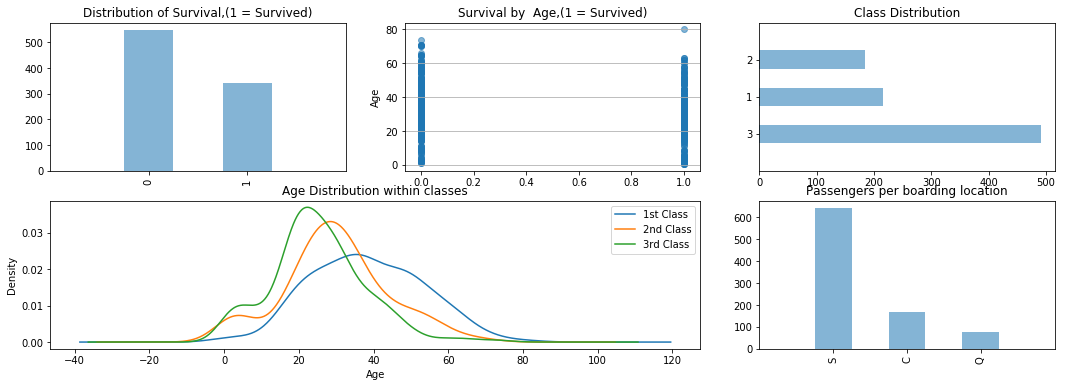

In [4]:
fig = plt.figure(figsize=(18,6))
alpha = alpha_scatterplot = 0.2
alpha_bar_chart = 0.55

#2*3的图
ax1 = plt.subplot2grid((2,3),(0,0))
#bar
data.Survived.value_counts().plot(kind='bar',alpha=alpha_bar_chart)
ax1.set_xlim(-1,2)
plt.title("Distribution of Survival,(1 = Survived)")

#age scatter
plt.subplot2grid((2,3),(0,1))
plt.scatter(data.Survived,data.Age,alpha=alpha_bar_chart)
plt.ylabel("Age")
plt.grid(b=True,which='major',axis='y')
plt.title("Survival by  Age,(1 = Survived)")

#class distribution
ax3 = plt.subplot2grid((2,3),(0,2))
data.Pclass.value_counts().plot(kind='barh',alpha=alpha_bar_chart)
ax3.set_ylim(-1,len(data.Pclass.value_counts()))
plt.title("Class Distribution")

#density by class
plt.subplot2grid((2,3),(1,0),colspan=2)
data.Age[data.Pclass==1].plot(kind="kde")
data.Age[data.Pclass==2].plot(kind="kde")
data.Age[data.Pclass==3].plot(kind="kde")
plt.xlabel("Age")
plt.title("Age Distribution within classes")
plt.legend(('1st Class','2nd Class','3rd Class'),loc='best')

#boarding location
ax5 = plt.subplot2grid((2,3),(1,2))
data.Embarked.value_counts().plot(kind='bar',alpha=alpha_bar_chart)
ax5.set_xlim(-1,len(data.Embarked.value_counts()))
plt.title('Passengers per boarding location')

### 生还情况

Text(0.5,1,u'Survival Breakdown(1 = Survived,0 = Died)')

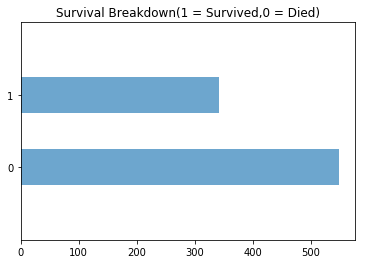

In [5]:
plt.figure(figsize=(6,4))
ax = plt.subplot()
data.Survived.value_counts().plot(kind='barh',alpha=0.65)
ax.set_ylim(-1,len(data.Survived.value_counts()))
plt.title('Survival Breakdown(1 = Survived,0 = Died)')

### 与性别有关吗？

(-1, 2)

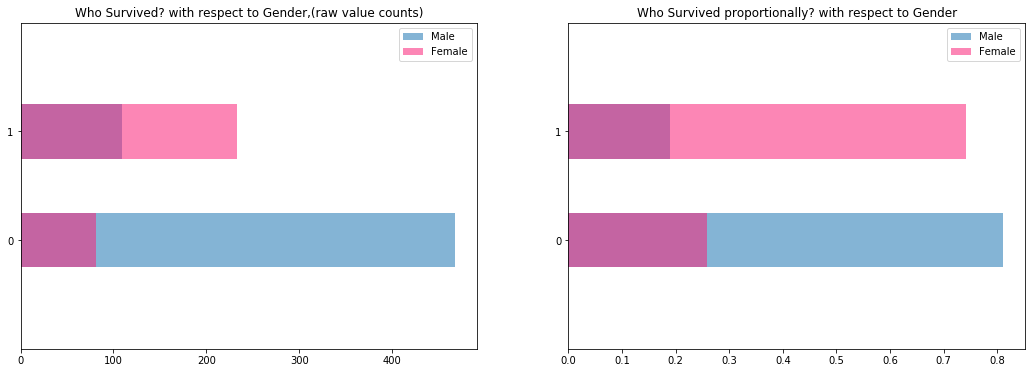

In [6]:
fig = plt.figure(figsize=(18,6))

data_male = data.Survived[data.Sex == 'male'].value_counts().sort_index()
data_female = data.Survived[data.Sex == 'female'].value_counts().sort_index()

#生还人数
ax1 = fig.add_subplot(121)
data_male.plot(kind='barh',label='Male',alpha=0.55)
data_female.plot(kind='barh',color='#FA2379',label='Female',alpha=0.55)
plt.title('Who Survived? with respect to Gender,(raw value counts)')
plt.legend(loc="best")
ax1.set_ylim(-1,2)

#生还比例
ax2 = fig.add_subplot(122)
(data_male/float(data_male.sum())).plot(kind='barh',label='Male',alpha=0.55)
(data_female/float(data_female.sum())).plot(kind='barh',color='#FA2379',label='Female',alpha=0.55)
plt.title('Who Survived proportionally? with respect to Gender')
plt.legend(loc='best')
ax2.set_ylim(-1,2)

### 与社会地位有关吗？

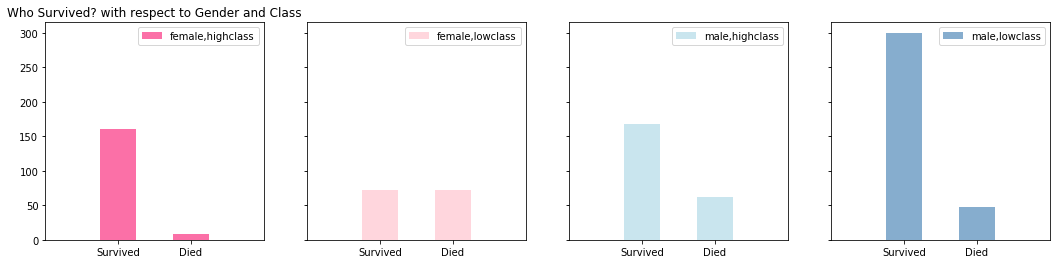

In [65]:
fig = plt.figure(figsize=(18,4))
alpha_level = 0.65
#female high class
ax1 = fig.add_subplot(141)
female_highclass = data.Survived[data.Sex == 'female'][data.Pclass != 3].value_counts()
female_highclass.plot(kind = 'bar',label='female,highclass',color='#FA2479',alpha=alpha_level)
ax1.set_xticklabels(["Survived","Died"],rotation=0)
ax1.set_xlim(-1,len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class");
plt.legend(loc='best')

#female low class
ax2 = fig.add_subplot(142,sharey=ax1)
female_lowclass = data.Survived[data.Sex == 'female'][data.Pclass == 3].value_counts()
female_lowclass.plot(kind = 'bar',label='female,lowclass',color='pink',alpha=alpha_level)
ax2.set_xticklabels(["Survived","Died"],rotation=0)
ax2.set_xlim(-1,len(female_lowclass))
#ax2.set_ylim(0,170)
plt.legend(loc="best")

#male high class
ax3 = fig.add_subplot(143,sharey=ax1)
male_highclass = data.Survived[data.Sex == 'male'][data.Pclass != 3].value_counts()
male_highclass.plot(kind = 'bar',label='male,highclass',color = 'lightblue',alpha=alpha_level)
ax3.set_xticklabels(["Survived","Died"],rotation=0)
ax3.set_xlim(-1,len(male_highclass))
ax3.legend(loc="best")

#male low class
ax4 = fig.add_subplot(144,sharey=ax1)
male_lowclass = data.Survived[data.Sex == 'male'][data.Pclass == 3].value_counts()
male_lowclass.plot(kind = 'bar',label='male,lowclass',color='steelblue',alpha=alpha_level)
ax4.set_xticklabels(["Survived","Died"],rotation=0)
ax4.set_xlim(-1,len(male_lowclass))
ax4.legend(loc="best")


串起来看问题

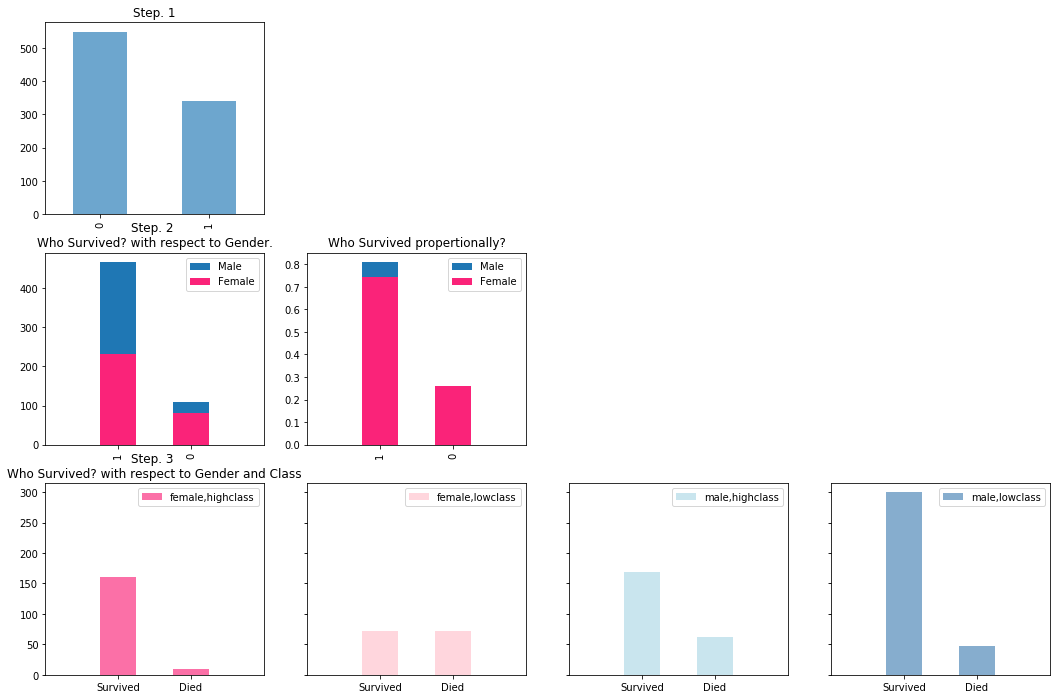

In [64]:
fig = plt.figure(figsize=(18,12))
a=0.65
#step 1,生还人数对比
ax1 = plt.subplot(341)
data.Survived.value_counts().plot(kind='bar',alpha=a)
ax.set_xlim(-1,len(data.Survived.value_counts()))
plt.title('Step. 1')

#Step 2,性别有关没有
ax2 = fig.add_subplot(345)
data.Survived[data.Sex == 'male'].value_counts().plot(kind='bar',label='Male')
data.Survived[data.Sex == 'female'].value_counts().plot(kind='bar',color='#FA2379',label='Female')
ax2.set_xlim(-1,2)
plt.title('Step. 2 \nWho Survived? with respect to Gender.')
plt.legend(loc='best')

ax3 = fig.add_subplot(346)
(data.Survived[data.Sex == 'male'].value_counts()/float(data.Sex[data.Sex=='male'].size)).plot(kind='bar',label='Male')
(data.Survived[data.Sex == 'female'].value_counts()/float(data.Sex[data.Sex=='female'].size)).plot(kind='bar',color='#FA2379',label='Female')
ax3.set_xlim(-1,2)
plt.title('Who Survived propertionally?')
plt.legend(loc='best')

#Step 3,与Pclass有关没有
ax4 = fig.add_subplot(349)
female_highclass = data.Survived[data.Sex == 'female'][data.Pclass != 3].value_counts()
female_highclass.plot(kind = 'bar',label='female,highclass',color='#FA2479',alpha=alpha_level)
ax4.set_xticklabels(["Survived","Died"],rotation=0)
ax4.set_xlim(-1,len(female_highclass))
plt.title("Step. 3 \nWho Survived? with respect to Gender and Class");
plt.legend(loc='best')

#female low class
ax5 = fig.add_subplot(3,4,10,sharey=ax4)
female_lowclass = data.Survived[data.Sex == 'female'][data.Pclass == 3].value_counts()
female_lowclass.plot(kind = 'bar',label='female,lowclass',color='pink',alpha=alpha_level)
ax5.set_xticklabels(["Survived","Died"],rotation=0)
ax5.set_xlim(-1,len(female_lowclass))
#ax2.set_ylim(0,170)
plt.legend(loc="best")

#male high class
ax6 = fig.add_subplot(3,4,11,sharey=ax4)
male_highclass = data.Survived[data.Sex == 'male'][data.Pclass != 3].value_counts()
male_highclass.plot(kind = 'bar',label='male,highclass',color = 'lightblue',alpha=alpha_level)
ax6.set_xticklabels(["Survived","Died"],rotation=0)
ax6.set_xlim(-1,len(male_highclass))
ax6.legend(loc="best")

#male low class
ax7 = fig.add_subplot(3,4,12,sharey=ax4)
male_lowclass = data.Survived[data.Sex == 'male'][data.Pclass == 3].value_counts()
male_lowclass.plot(kind = 'bar',label='male,lowclass',color='steelblue',alpha=alpha_level)
ax7.set_xticklabels(["Survived","Died"],rotation=0)
ax7.set_xlim(-1,len(male_lowclass))
ax7.legend(loc="best")


# 数据处理
1. 剔除PassengerId,Ticket这两个变量，我们不用（不过后面需要看哪些情况预测错误所以这里PassengerId先保留）。
2. 将Embarked变量补全，然后对Survived,Name,Sex,Embarked进行one-hot编码。
3. 对Pclass,Fare,SlibSp和Parch进行归一化处理。
4. 根据Name,Sex,SibSp,Parch预测age将其补全。
5. 对未编码的Survived提出当做目标变量

通常的处理需要做的工作：
1. 缺失数据处理
2. 异常数据
3. 数据标准化
4. 数据特征变换
5. 新特征
6. 降维
7. ……

### drop

In [66]:
#data.drop(['PassengerId','Ticket'],axis=1,inplace=True)
data.drop(['Ticket'],axis=1,inplace=True)

In [67]:
#补全Embarked变量
data.loc[data.Embarked.isnull(),'Embarked']='S'

### one-hot 编码

In [79]:
#one-hot 编码
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

le_sex=LabelEncoder().fit(data['Sex'])
Sex_label=le_sex.transform(data['Sex'])
obe_sex=OneHotEncoder(sparse=False).fit(Sex_label.reshape(-1,1))
Sex_obe=obe_sex.transform(Sex_label.reshape(-1,1))

le_embarked=LabelEncoder().fit(data['Embarked'])
Embarked_label=le_embarked.transform(data['Embarked'])
obe_embarked=OneHotEncoder(sparse=False).fit(Embarked_label.reshape(-1,1))
Embarked_obe =obe_embarked.transform(Embarked_label.reshape(-1,1))
Embarked_obe

array([[ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])